In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()

In [49]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [50]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [51]:
df=pd.DataFrame(dataset['data'], columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [52]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [53]:
X=df
y=dataset['target']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<Axes: >

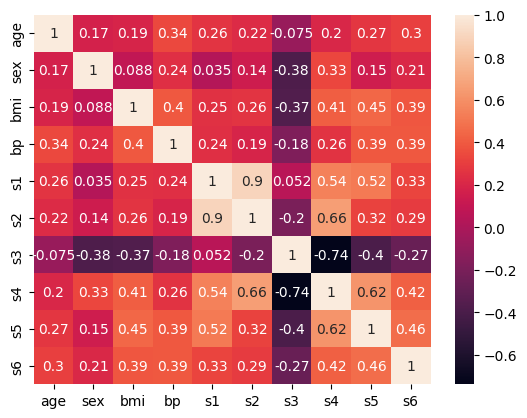

In [55]:
sns.heatmap(df.corr(), annot=True)

In [56]:
#check the unique values in the target column
np.unique(y_train)

array([ 25.,  37.,  39.,  42.,  44.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  57.,  58.,  59.,  60.,  61.,  63.,  64.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  77.,  78.,
        79.,  81.,  83.,  84.,  85.,  87.,  88.,  89.,  90.,  91.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       107., 108., 109., 110., 111., 113., 115., 116., 118., 120., 121.,
       122., 123., 124., 125., 127., 128., 129., 131., 132., 134., 135.,
       136., 137., 138., 139., 140., 141., 142., 143., 144., 146., 148.,
       150., 151., 152., 153., 155., 156., 158., 160., 161., 162., 163.,
       164., 166., 167., 168., 170., 171., 172., 173., 174., 177., 178.,
       179., 180., 181., 182., 183., 185., 186., 187., 189., 190., 191.,
       192., 195., 196., 197., 198., 199., 200., 201., 202., 206., 208.,
       209., 210., 212., 214., 215., 216., 219., 220., 221., 222., 225.,
       229., 230., 232., 233., 235., 236., 237., 24

In [57]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()

Using this will not be fine we will hyperparameter tune it

In [58]:
params={
    'criterion': ['squared_error', 'friedman_mse','absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5,10,15,20],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [63]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model, params, cv=5,scoring='accuracy')

In [64]:
import warnings 
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [65]:
grid.best_score_

np.float64(0.00967741935483871)

In [62]:
grid.best_params_   

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [66]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred=grid.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 6128.300751879699
R2 Score: 0.03150769693255362
Mean Absolute Error: 63.1578947368421


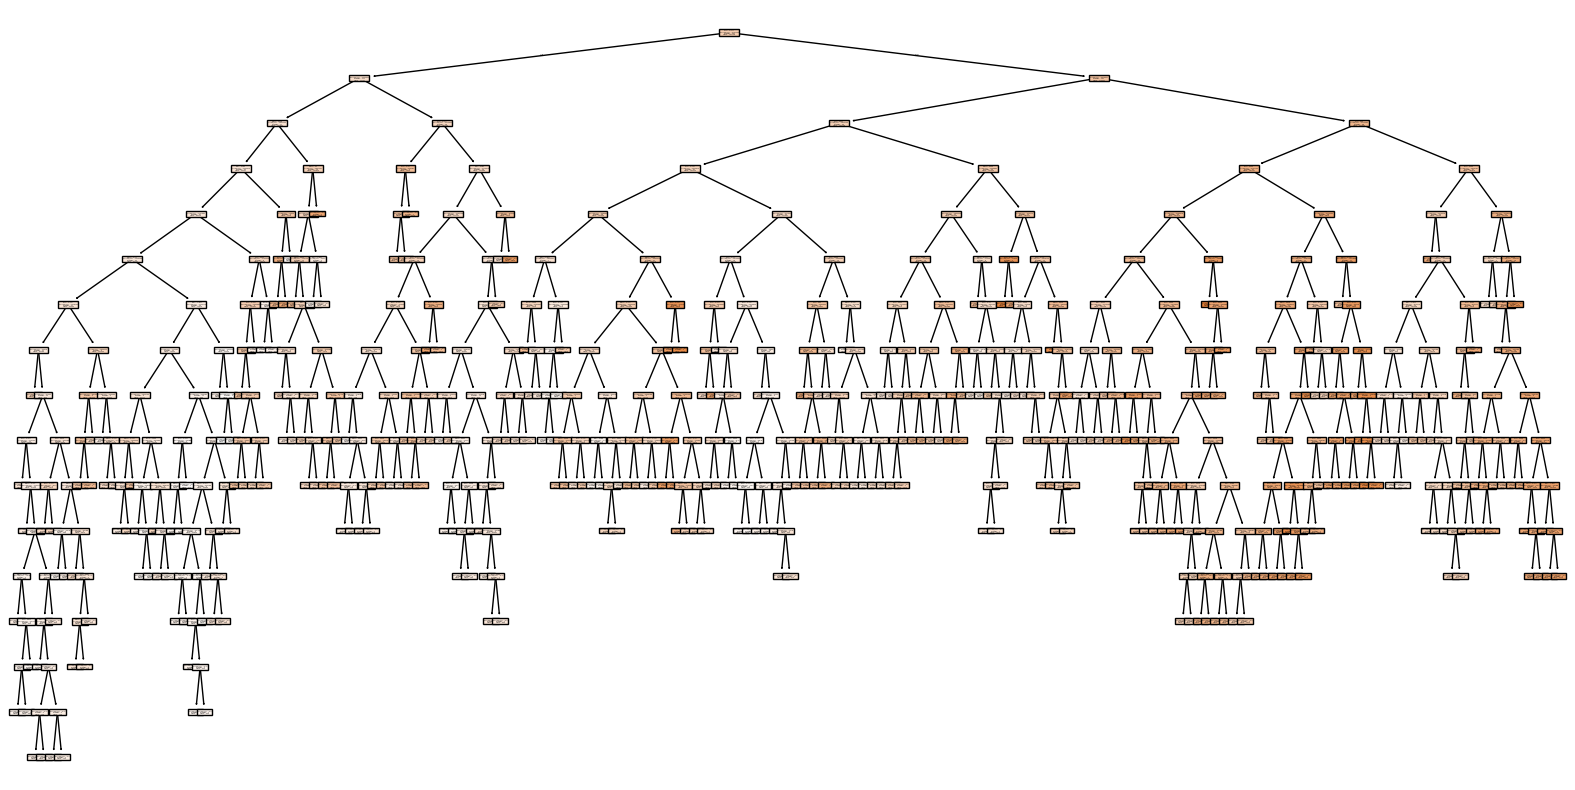

In [67]:
from sklearn.tree import plot_tree

best_model = grid.best_estimator_
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, filled=True)
plt.show()